the corr is already good

# **Food Delivery Time Prediction** 🛵

| **Field Name**            | **Description**                                                                                 | **Data Type**   |
|----------------------------|---------------------------------------------------------------------------------------------|-----------------|
| **Order_ID**              | Unique identifier for each order.                                                            | String/Integer  |
| **Distance_km**           | The delivery distance in kilometers.                                                         | Float           |
| **Weather**               | Weather conditions during the delivery (e.g., Clear, Rainy, Snowy, Foggy, Windy).            | Categorical     |
| **Traffic_Level**         | Traffic conditions categorized as Low, Medium, or High.                                      | Categorical     |
| **Time_of_Day**           | The time when the delivery took place (e.g., Morning, Afternoon, Evening, Night).            | Categorical     |
| **Vehicle_Type**          | Type of vehicle used for delivery (e.g., Bike, Scooter, Car).                                | Categorical     |
| **Preparation_Time_min**  | The time required to prepare the order, measured in minutes.                                 | Integer         |
| **Courier_Experience_yrs**| Experience of the courier in years.                                                          | Float           |
| **Delivery_Time_min**     | The total delivery time in minutes (target variable).                                        | Float           |
| **Usability**             | Indicates usability, scored at 10.00.                                                       | Float           |
| **License**               | Specifies the licensing type, here Apache 2.0.                                              | String          |
| **Expected update frequency** | Indicates that the dataset will not be updated.                                           | String          |

<div style="background-color:red; padding:20px; color:white; border-radius:15px; text-align:center; font-size:30px; font-family:'Poppins';">Objective</div>



1. **Exploratory Data Analysis (EDA)**
   - Removing Unnecessary Data
   - Dealing with Duplicate Records
   - Outliers Anaysis
   - Uniquenes Analysis
   - Data Transformation
   - Data Validation
   - Univariate Data Visualization
     - Distribution Analysis
     - Box Plot 
   - Bivariate Data Visualization
   - Multivariate Data Visualization
     - Pairplot

2. **Pre-processing**
   - Handling Missing Values (imputation/removal)
   - Handling duplicates (removal)
   - Handling outliers (imputaton/removal)
   - Feature Transformation (converting dtypes, normalization)
   - Feature selection (corr, feature importance, etc)

3. **Modelling**
   - Linear Reg OLS
   - Linear Reg GD 
   - Model Evaluation
  
4. **End Product - Visualization**

<div style="background-color:red; padding:20px; color:white; border-radius:15px; text-align:center; font-size:30px; font-family:'Poppins';">1 | Exploratory Data Analysis</div>


<div style="background-color:white; padding:20px; color:red; border-radius:15px; font-size:20px; font-family:'Poppins';">Load Library</div>


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df_read = pd.read_csv("dataset/Food_Delivery_Times.csv")

In [5]:
df_read.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


<div style="background-color:white; padding:20px; color:red; border-radius:15px; font-size:20px; font-family:'Poppins';">Size of Data</div>


In [6]:
print(f'Total Row Data: {df_read.shape[0]}')
print(f'Total Columns Data: {df_read.shape[1]}')

Total Row Data: 1000
Total Columns Data: 9


<div style="background-color:white; padding:20px; color:red; border-radius:15px; font-size:20px; font-family:'Poppins';">Descriptive & Characteristic Analysis</div>


In [7]:
df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


**We Can See:**
- All the datatypes was correct 

<div style="background-color:white; padding:20px; color:red; border-radius:15px; font-size:20px; font-family:'Poppins';">Inconsistensies Analysis</div>


### **Checking the NaN Data**

In [8]:
df_read.isna().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

**We Can See:**
- There are not valid value on `Weather`, `Trafic_Level`, `Time_of_day`, and `Courier_Experience_yrs`
- all column with NaN data equal of 30 
- we can determine to handle to remove or fill with mean

### **Checking the Duplicates Data**

In [9]:
df_read.duplicated().sum()

0

In [10]:
df_read[df_read.duplicated() == True]

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min


**We Can See:**
- There are no duplicates entry
- no need handle in pre-pro

### **Checking the Charateristic Numeric of Data**

In [11]:
df_read.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


**We Can See:**

1. **Delivery Time**: Average is 56.73 minutes, with a max of 153 minutes, indicating some outliers.
2. **Preparation Time**: Average is 16.98 minutes, suggesting most orders are prepared quickly.
3. **Courier Experience**: Average is 4.58 years, indicating moderate experience among couriers.
4. **Potential Correlations**: Explore relationships between distance, preparation time, and delivery time.
5. **Outliers**: Significant maximum delivery time suggests specific issues affecting efficiency.
6. **Variability**: Standard deviations indicate diverse scenarios in distance, preparation, and delivery times.

### **Checking the Charateristic Categoric of Data**

In [12]:
categorical_columns = df_read.select_dtypes(include=['object']).columns.tolist()
categorical_data=  df_read[categorical_columns]

data = {
    "Name": categorical_data.columns.tolist(),
    "dtype": categorical_data.dtypes.tolist(),
    "Non-Null": categorical_data.notnull().sum().tolist(),
    "Total Unique": categorical_data.nunique().tolist(),
    "Unique Values": [categorical_data[col].unique().tolist() for col in categorical_data.columns]
}

pd.DataFrame(data)

,Name,dtype,Non-Null,Total Unique,Unique Values
0,Weather,object,970,5,"[Windy, Clear, Foggy, Rainy, Snowy, nan]"
1,Traffic_Level,object,970,3,"[Low, Medium, High, nan]"
2,Time_of_Day,object,970,4,"[Afternoon, Evening, Night, Morning, nan]"
3,Vehicle_Type,object,1000,3,"[Scooter, Bike, Car]"


### **Order ID is not suit for analysis, we just drop it**

In [13]:
df_read = df_read.drop(columns=['Order_ID'])


<div style="background-color:white; padding:20px; color:red; border-radius:15px; font-size:20px; font-family:'Poppins';">Outliers Analysis</div>


In [14]:
numeric_df = df_read.select_dtypes(include=[np.number])

for col in numeric_df:
    Q1 = df_read[col].quantile(0.25)
    Q3 = df_read[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_read[(df_read[col] < lower_bound) | (df_read[col] > upper_bound)]
    print(f"Outliers for {col}:")
    display(outliers)

Outliers for Distance_km:


,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min


Outliers for Preparation_Time_min:


,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min


Outliers for Courier_Experience_yrs:


,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min


Outliers for Delivery_Time_min:


,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
29,18.05,Clear,Medium,Evening,Scooter,10,7.0,123
127,18.97,Clear,Low,Evening,Car,25,4.0,141
379,18.46,Clear,NaN,NaN,Scooter,29,1.0,153
452,15.64,Rainy,Low,NaN,Bike,20,4.0,141
784,14.83,Rainy,Low,Morning,Car,19,4.0,126
924,17.81,Windy,High,Evening,Bike,21,4.0,122


**We Can See:**
- The dataset were clean with outliers, except column `Delivery_Time_min`
- `Delivery_Time_min` has 6 row data, with caracteristic above 120, and no below that
- We can determine to keep the outliers because not effect to the model significanly and give the model a variance

<div style="background-color:white; padding:20px; color:red; border-radius:15px; font-size:20px; font-family:'Poppins';">Univariate Analysis</div>


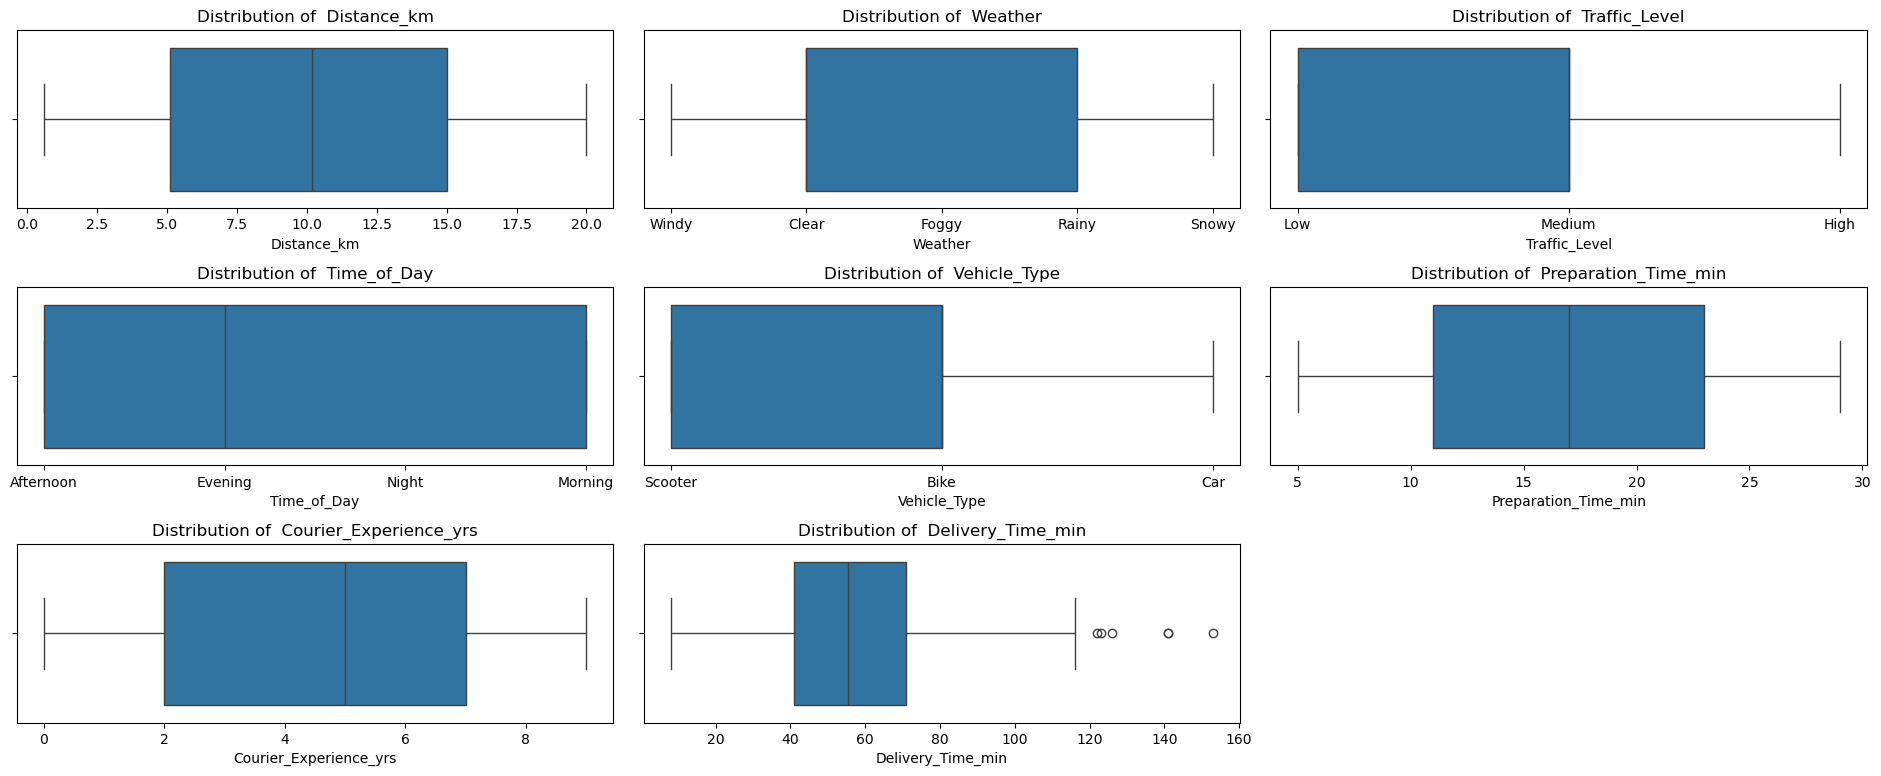

In [ ]:
plt.figure(figsize=(19, 10))
for i, col in enumerate(df_read.columns):
    plt.subplot(4, 3, i+1)
    plt.title(f'Distribution of c {col}')
    sns.boxplot(data=df_read, x=col)
plt.tight_layout()
plt.show()

- there are no data with outliers except `delivery_time_min` which has some

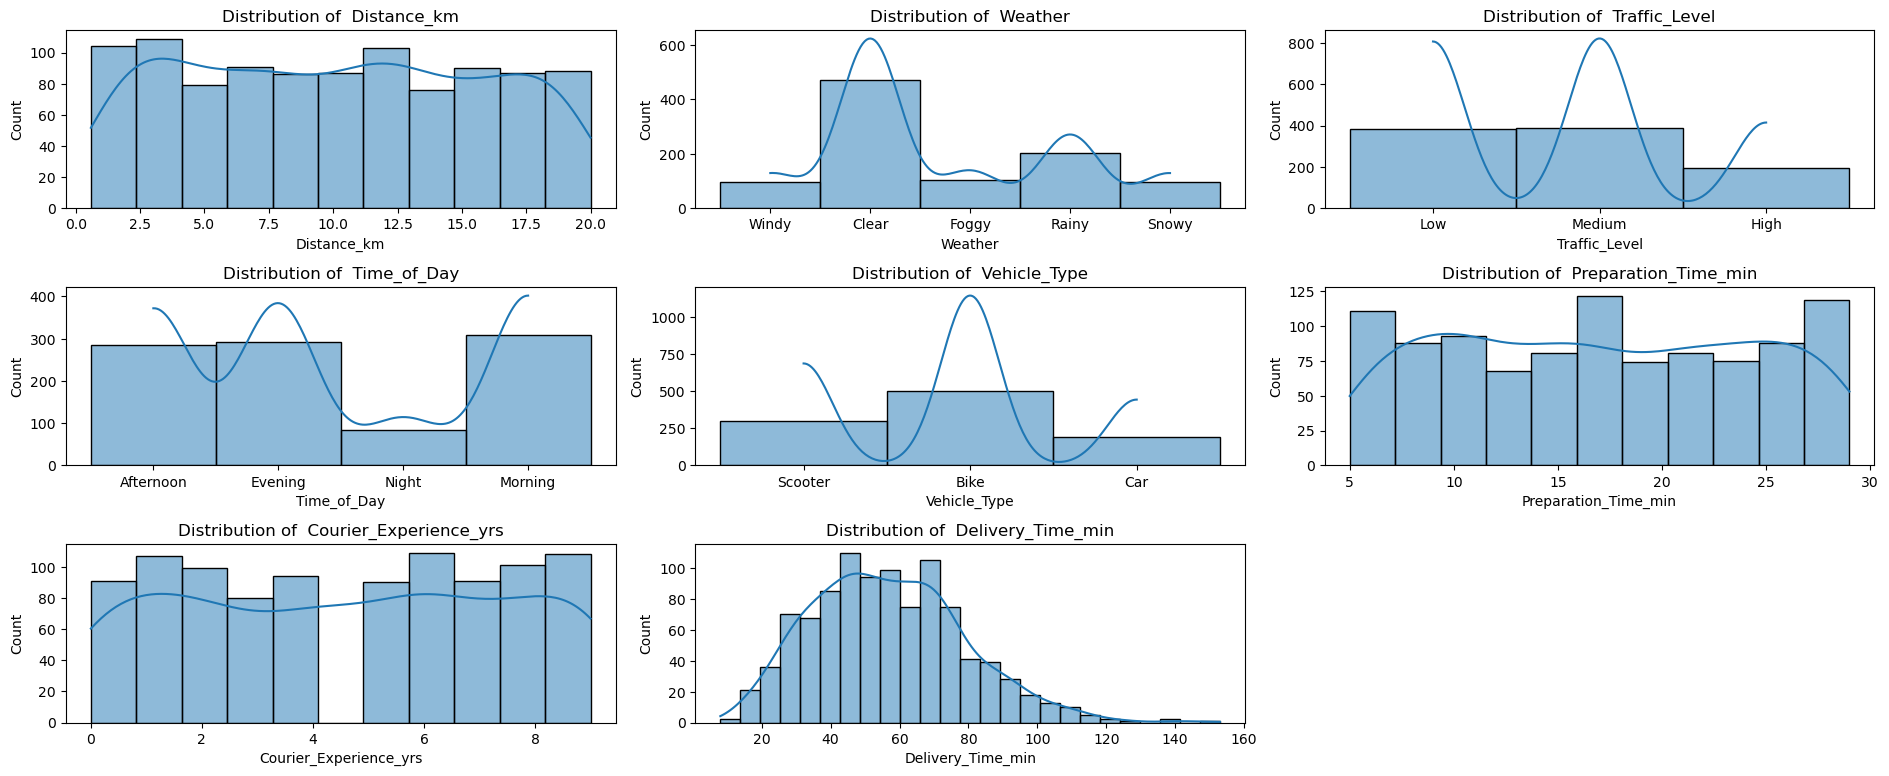

In [16]:
plt.figure(figsize=(19, 10))
for i, col in enumerate(df_read.columns):
    plt.subplot(4, 3, i+1)
    plt.title(f'Distribution of  {col}')
    sns.histplot(data=df_read, x=col, kde=True)
plt.tight_layout()
plt.show()

**We Can See:**
- there are no data with outliers except `delivery_time_min`

<div style="background-color:white; padding:20px; color:red; border-radius:15px; font-size:20px; font-family:'Poppins';">Bivariate Analysis</div>


In [17]:
object_columns = list(df_read.select_dtypes(include='object').columns)
object_columns

['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

**Let's check weather distirbution** 🌤️

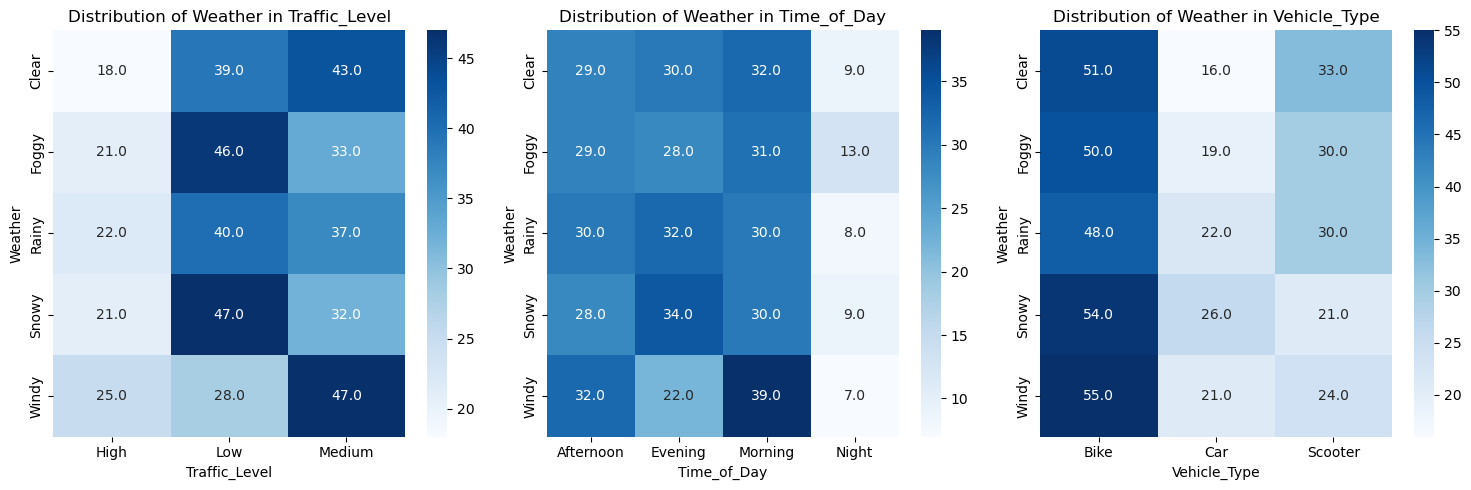

In [18]:
# checking the weather distribution in categorical data distribution
plt.figure(figsize=(15, 5))
for i, col in enumerate(df_read[object_columns].drop('Weather', axis=1)):
	plt.subplot(1, 3, i+1)
	result = df_read.groupby('Weather')[col].value_counts().unstack()
	result = result.apply(lambda x: round(x/result.sum(axis=1), 2) * 100)
	sns.heatmap(result, annot=True, fmt='.1f', cmap='Blues')
	plt.title(f'Distribution of Weather in {col}')
plt.tight_layout()
plt.show()

`Traffic_Level`:
- high usually have windy weather
- medium usually has windy / clear
- low usually snowy / windy (makes sense, the driver want to give the food immediately, so low traffic is the best when snowy)

`Time_of_Day`:
- morning stands out, the order is mostly when it is windy
- maybe people often feels hungry when it is windy in the morning!

`Vehicle_type`:
- They use car, when it is snowy (you dont want to get cold, dont ya)
- Scooter is often used when it is clear
- But Bike, they use it in any situation

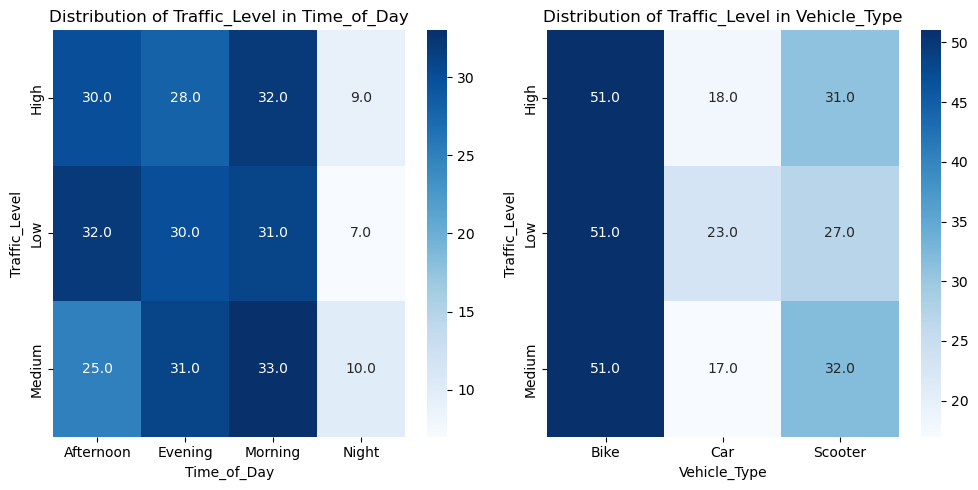

In [19]:
# checking the weather distribution in categorical data distribution
plt.figure(figsize=(15, 5))
for i, col in enumerate(df_read[object_columns].drop(['Weather', 'Traffic_Level'], axis=1)):
	plt.subplot(1, 3, i+1)
	result = df_read.groupby('Traffic_Level')[col].value_counts().unstack()
	result = result.apply(lambda x: round(x/result.sum(axis=1), 2) * 100)
	sns.heatmap(result, annot=True, fmt='.1f', cmap='Blues')
	plt.title(f'Distribution of Traffic_Level in {col}')
plt.tight_layout()
plt.show()

`Time_of_day`:
- Night orders are very rare
- On the other times, they distribution is sorta similar
- Afternoon usually low, prolly because not so many people go out
- Morning is mostly Med-High (many people go to work, so rush hour 😌)

`Vehicle_Type`:
- Car mostly used in Low Traffic
- Scooter has faster mobility so suitable for high/med traffic

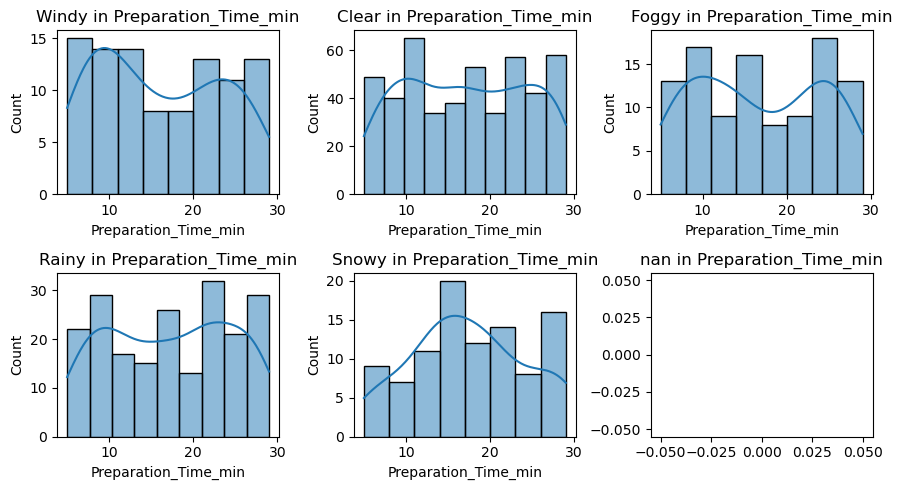

In [20]:
plt.figure(figsize=(9, 5))
for i, weather in enumerate(df_read['Weather'].unique()):
     plt.subplot(2, 3, i+1)
     result = df_read.loc[df_read['Weather'] == weather, 'Preparation_Time_min']
     sns.histplot(result, kde=True)
     plt.title(f'{weather} in Preparation_Time_min')
plt.tight_layout()
plt.show()

- `Snowy` peakes on the middle, while others are bimodal
- `Snowy` takes `longer` to prepare

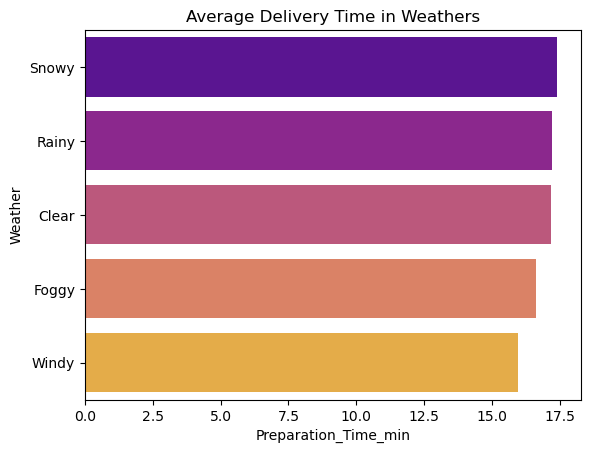

In [21]:
result = df_read.groupby('Weather')['Preparation_Time_min'].mean().reset_index().sort_values('Preparation_Time_min', ascending=False)
sns.barplot(x=result['Preparation_Time_min'], y=result['Weather'], hue=result['Weather'], palette='plasma')
plt.title('Average Delivery Time in Weathers')
plt.show()

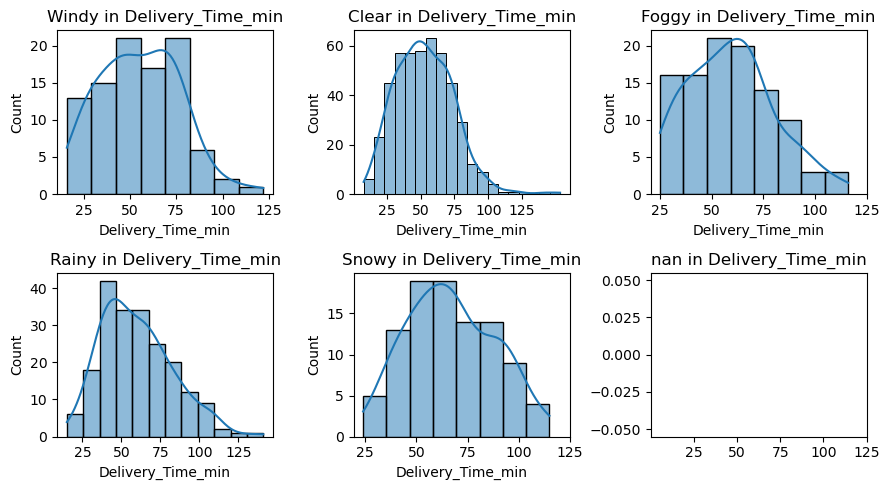

In [22]:
plt.figure(figsize=(9, 5))
for i, weather in enumerate(df_read['Weather'].unique()):
     plt.subplot(2, 3, i+1)
     result = df_read.loc[df_read['Weather'] == weather, 'Delivery_Time_min']
     sns.histplot(result, kde=True)
     plt.title(f'{weather} in Delivery_Time_min')
     plt.xticks(range(25, 150, 25))
plt.tight_layout()
plt.show()

- `windy`, `clear` has dilivery time around 25-75 minutes
- `Rainy` and `snowy`, `foggy` diliovery time around 28-75 minutes

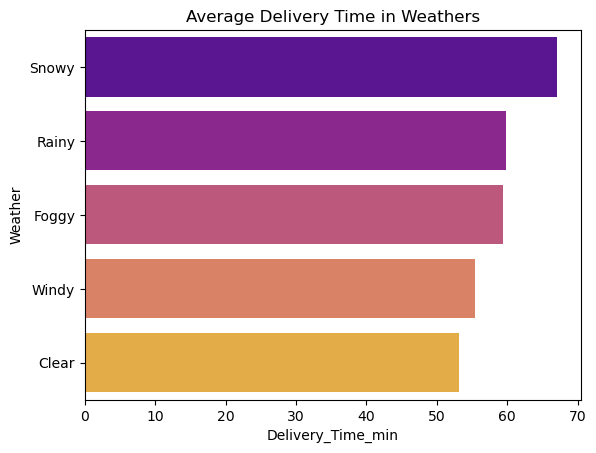

In [23]:
result = df_read.groupby('Weather')['Delivery_Time_min'].mean().reset_index().sort_values('Delivery_Time_min', ascending=False)
sns.barplot(x=result['Delivery_Time_min'], y=result['Weather'], hue=result['Weather'], palette='plasma')
plt.title('Average Delivery Time in Weathers')
plt.show()

it is right that snowy does take longer to delivery

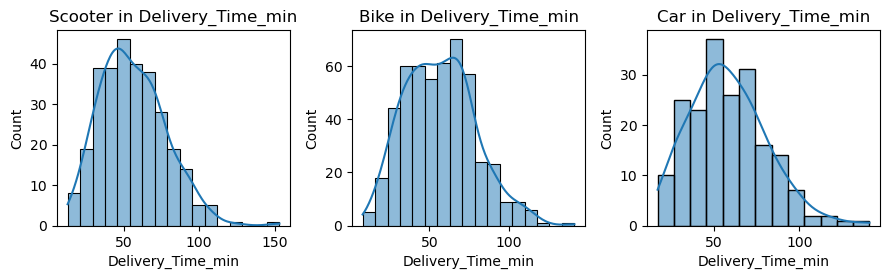

In [24]:
plt.figure(figsize=(9, 5))
for i, vehicle in enumerate(df_read['Vehicle_Type'].unique()):
     plt.subplot(2, 3, i+1)
     result = df_read.loc[df_read['Vehicle_Type'] == vehicle, 'Delivery_Time_min']
     sns.histplot(result, kde=True)
     plt.title(f'{vehicle} in Delivery_Time_min')
plt.tight_layout()
plt.show()

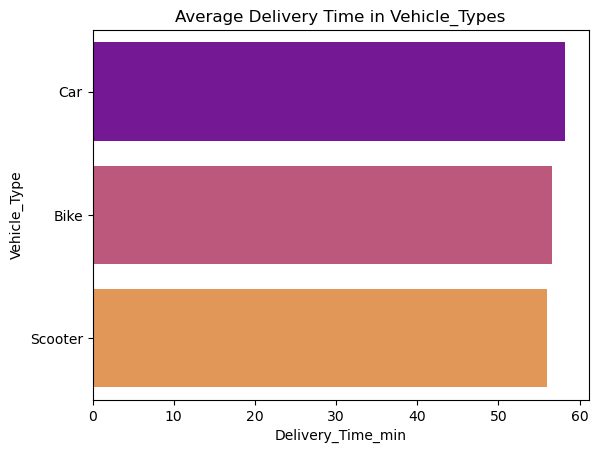

In [25]:
result = df_read.groupby('Vehicle_Type')['Delivery_Time_min'].mean().reset_index().sort_values('Delivery_Time_min', ascending=False)
sns.barplot(x=result['Delivery_Time_min'], y=result['Vehicle_Type'], hue=result['Vehicle_Type'], palette='plasma')
plt.title('Average Delivery Time in Vehicle_Types')
plt.show()

- `foggy` has distance **0-5 km**
- `weirdly` `snowy` usually has orders with longer distance, **15-20 km**
- maybe, because there aren't many drivers who accept orders, once they accept, they got long distances, just like how gojek works in Indonesia

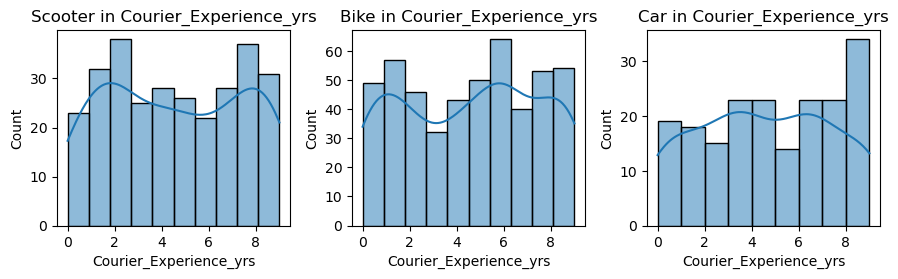

In [26]:
plt.figure(figsize=(9, 5))
for i, vehicle in enumerate(df_read['Vehicle_Type'].unique()):
     plt.subplot(2, 3, i+1)
     result = df_read.loc[df_read['Vehicle_Type'] == vehicle, 'Courier_Experience_yrs']
     sns.histplot(result, kde=True)
     plt.title(f'{vehicle} in Courier_Experience_yrs')
plt.tight_layout()
plt.show()

- For Scooter, there is a noticeable pattern where the count significantly drops after around 3 years. This suggests that couriers might stop delivering after paying off their scooters.
- For Bike, there is a significant pattern.
- The most interesting observation is that couriers with Car have more than 8 years of experience.

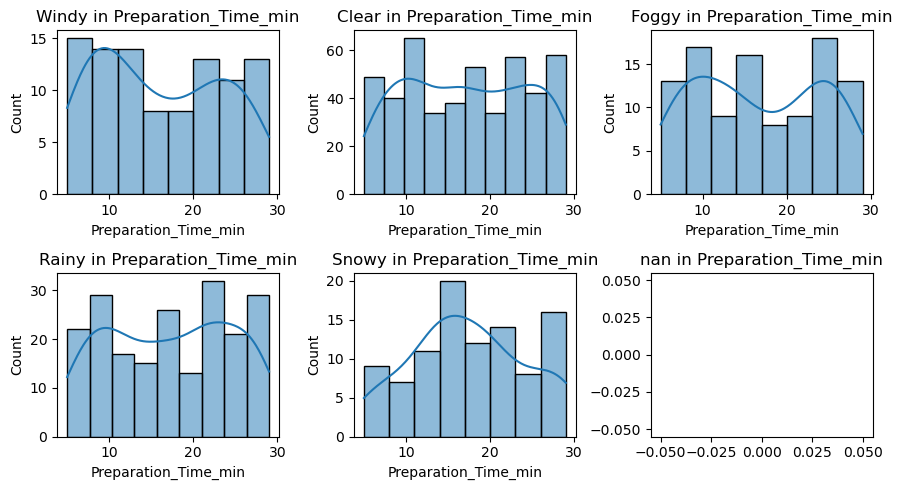

In [27]:
plt.figure(figsize=(9, 5))
for i, weather in enumerate(df_read['Weather'].unique()):
     plt.subplot(2, 3, i+1)
     result = df_read.loc[df_read['Weather'] == weather, 'Preparation_Time_min']
     sns.histplot(result, kde=True)
     plt.title(f'{weather} in Preparation_Time_min')
plt.tight_layout()
plt.show()

<div style="background-color:white; padding:20px; color:red; border-radius:15px; font-size:20px; font-family:'Poppins';">Multivariate Analysis </div>

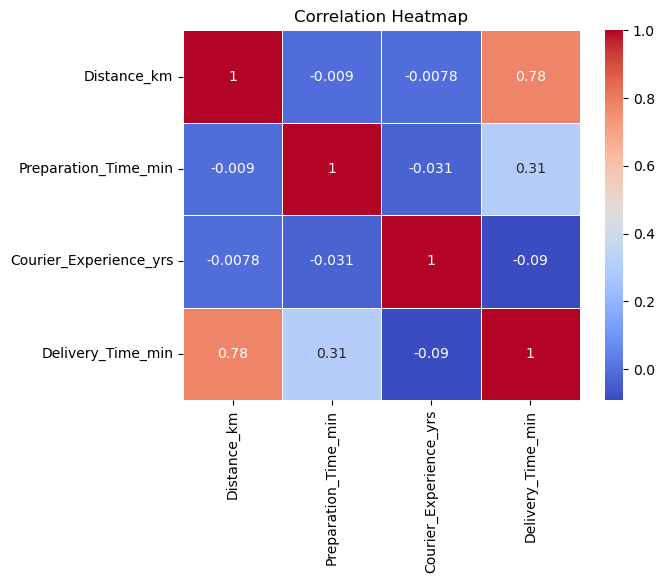

In [28]:
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

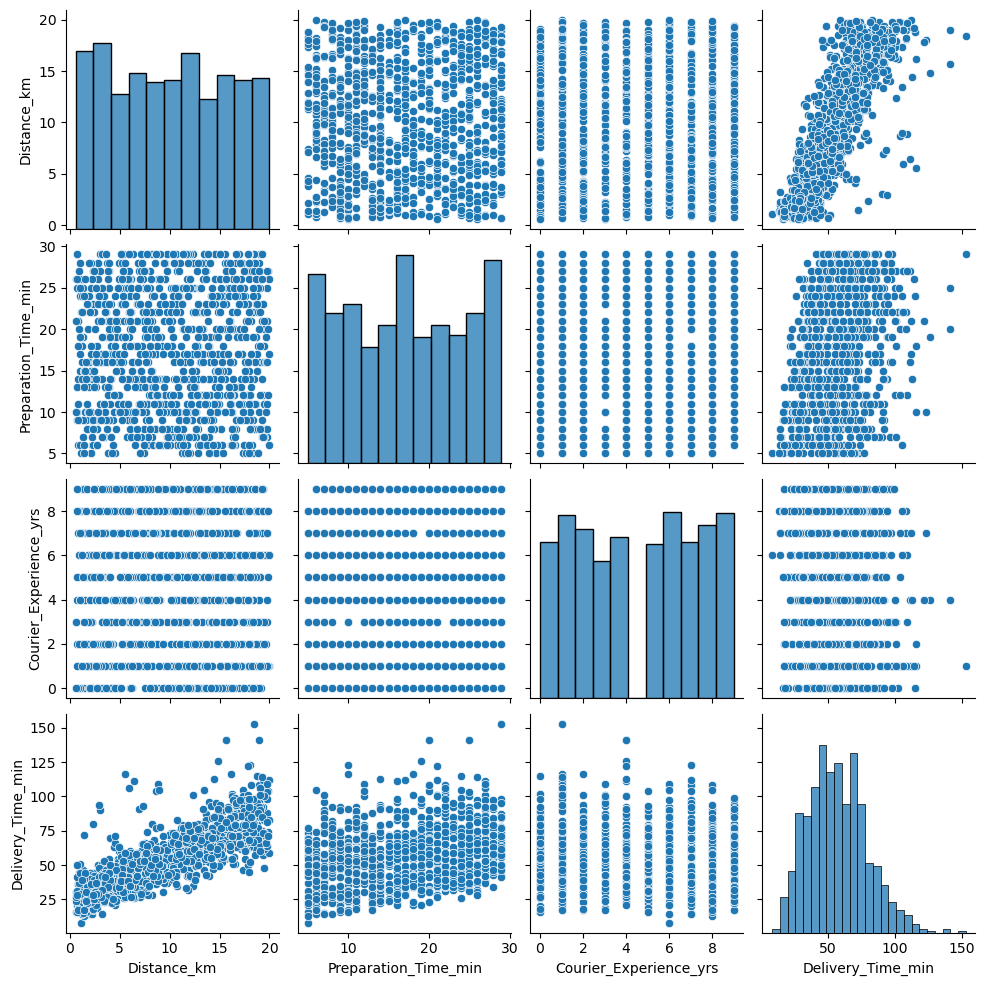

In [29]:
sns.pairplot(df_read)

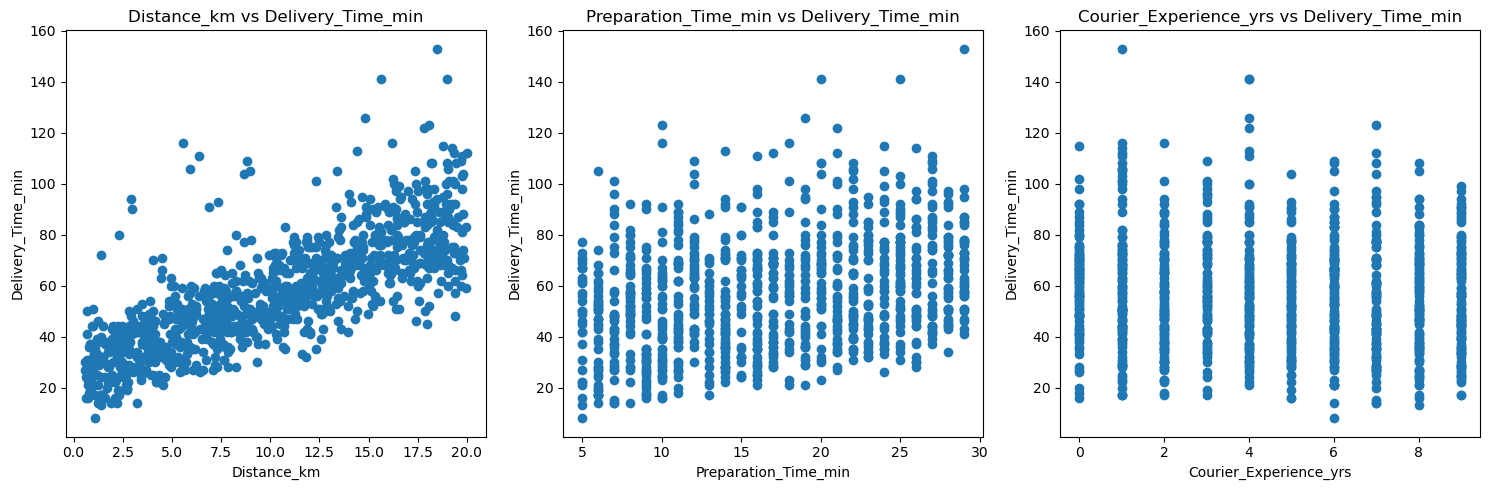

In [30]:
# Scatter plots for numerical columns
numerical_columns = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, 3, i+1)
    plt.scatter(df_read[col], df_read['Delivery_Time_min'])
    plt.title(f'{col} vs Delivery_Time_min')
    plt.xlabel(col)
    plt.ylabel('Delivery_Time_min')
plt.tight_layout()
plt.show()

📊 **Interpret the Result**
- Since we know the delivery time is what we want to predict, we need to find which column is the most correlated.
- Delivery Time vs Distance km shows a pattern where the higher the distance, the higher the delivery time needed.
- In contrast, Preparation Time vs Delivery Time does not show a significant pattern affecting the delivery time.
- Courier Experience does not show any pattern related to delivery time.

**Conclusion:** We can determine to use Distance as the predictor variable since it is the most correlated column with Delivery Time.

<div style="background-color:red; padding:20px; color:white; border-radius:15px; text-align:center; font-size:30px; font-family:'Poppins';">2 | Pre-processing</div>


In [31]:
df_read['Courier_Experience_yrs'].value_counts().reset_index()
exp_group = np.linspace(df_read['Courier_Experience_yrs'].min(), df_read['Courier_Experience_yrs'].max(), 4)
zip_exp_group = list(zip(exp_group, exp_group[1:]))
zip_exp_group

[(0.0, 3.0), (3.0, 6.0), (6.0, 9.0)]

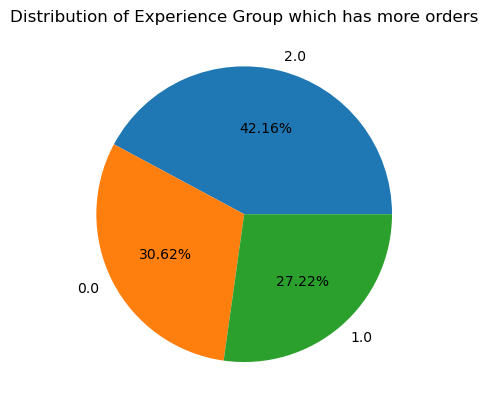

In [32]:
for i in range(len(zip_exp_group)):
     start = zip_exp_group[i][0]
     end = zip_exp_group[i][1]
     df_read.loc[(df_read['Courier_Experience_yrs'] > start-1) & (df_read['Courier_Experience_yrs'] <= end), 'Experience_group'] = int(i)
     result = df_read['Experience_group'].value_counts().reset_index()
plt.pie(result['count'], labels=result['Experience_group'], autopct='%2.2f%%')
plt.title('Distribution of Experience Group which has more orders')
plt.show()

couriers with `6-9 years` experience have more orders, maybe many people have validate their performance so the system get them more orders

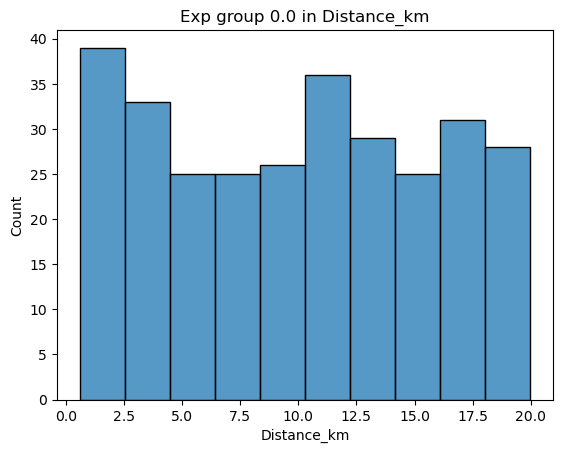

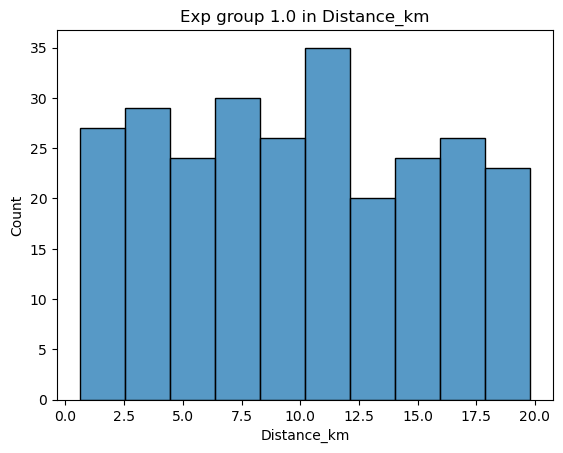

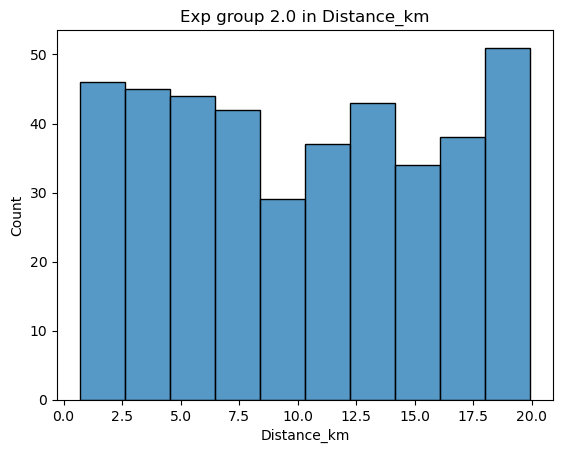

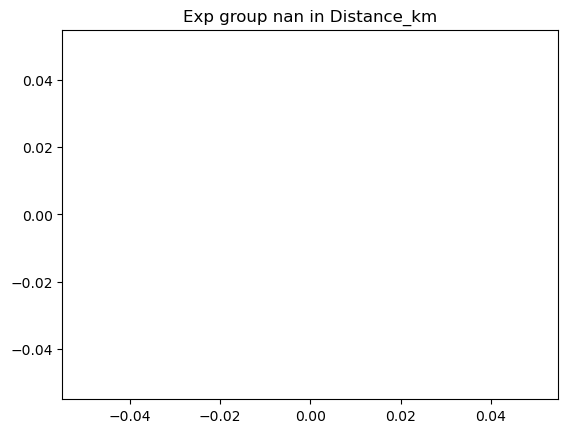

In [33]:
for group in np.sort(df_read['Experience_group'].unique()):
     result = df_read.loc[df_read['Experience_group'] == group, 'Distance_km']
     sns.histplot(result)
     plt.title(f'Exp group {group} in Distance_km')
     plt.show()

In [34]:
for col in ['Traffic_Level', 'Time_of_Day']:
     for weather in df_read['Weather'].unique():
          mode = df_read[df_read['Weather'] == weather][col].mode()
          if len(mode) == 0:
               continue
          indices = (df_read.loc[df_read[col].isna()]['Weather'] == weather).index
          df_read.loc[indices, col] = mode[0]

In [35]:
for Traffic_Level in df_read['Traffic_Level'].unique():
          mode = df_read[df_read['Traffic_Level'] == Traffic_Level]['Weather'].mode()
          if len(mode) == 0:
               continue
          indices = (df_read.loc[df_read['Weather'].isna()]['Traffic_Level'] == Traffic_Level).index
          df_read.loc[indices, 'Weather'] = mode[0]

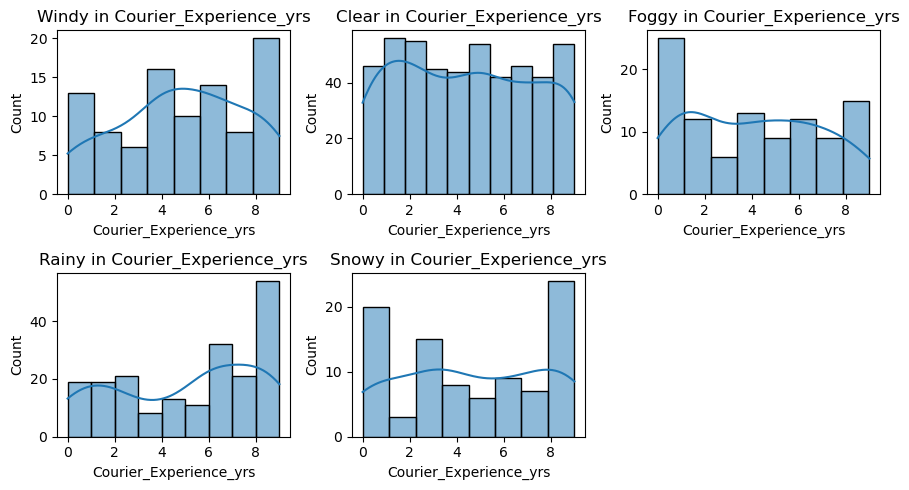

In [36]:
plt.figure(figsize=(9, 5))
for i, weather in enumerate(df_read['Weather'].unique()):
     plt.subplot(2, 3, i+1)
     result = df_read.loc[df_read['Weather'] == weather, 'Courier_Experience_yrs']
     sns.histplot(result, kde=True)
     plt.title(f'{weather} in Courier_Experience_yrs')
plt.tight_layout()
plt.show()

In [37]:
for weather in df_read['Weather'].unique():
     mode = df_read[df_read['Weather'] == weather]['Courier_Experience_yrs'].mode()
     if len(mode) == 0:
          continue
     indices = (df_read.loc[df_read['Courier_Experience_yrs'].isna()]['Weather'] == weather).index
     df_read.loc[indices, 'Courier_Experience_yrs'] = mode[0]

In [38]:
df_read.isna().sum()

Distance_km                0
Weather                    0
Traffic_Level              0
Time_of_Day                0
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs     0
Delivery_Time_min          0
Experience_group          30
dtype: int64

In [39]:
for i in range(len(zip_exp_group)):
     start = zip_exp_group[i][0]
     end = zip_exp_group[i][1]
     df_read.loc[(df_read['Courier_Experience_yrs'] > start-1) & (df_read['Courier_Experience_yrs'] <= end), 'Experience_group'] = int(i)
     result = df_read['Experience_group'].value_counts().reset_index()

since there is no duplications, we're going to skip this part. Next, **Outlier Handling!**

In [40]:
df_read['Delivery_Time_min'].describe()

count    1000.000000
mean       56.732000
std        22.070915
min         8.000000
25%        41.000000
50%        55.500000
75%        71.000000
max       153.000000
Name: Delivery_Time_min, dtype: float64

In [41]:
Q1 = df_read['Delivery_Time_min'].quantile(0.25)
Q3 = df_read['Delivery_Time_min'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR

In [42]:
result = df_read[df_read['Delivery_Time_min'] > upper]['Delivery_Time_min']
result

29     123
127    141
379    153
452    141
784    126
924    122
Name: Delivery_Time_min, dtype: int64

In [43]:
print(f'Percentage of the outliers: {len(result) / len(df_read) * 100}%')

Percentage of the outliers: 0.6%


there are 6 outliers in Delivery_Time_min in total, which is only 0.6% of the data. will it be detected using zscore?

In [44]:
zscores = (df_read['Delivery_Time_min'] - df_read['Delivery_Time_min'].mean()) / df_read['Delivery_Time_min'].std()
zscores

0     -0.622176
1      1.235472
2      0.102760
3     -0.894027
4      0.510536
         ...   
995   -0.123783
996    0.646462
997    1.099547
998   -0.078474
999    0.057451
Name: Delivery_Time_min, Length: 1000, dtype: float64

In [45]:
zscores[(zscores < -3) | (zscores > 3)]

29     3.002503
127    3.818056
379    4.361758
452    3.818056
784    3.138429
Name: Delivery_Time_min, dtype: float64

5 of them are claimed as outliers using zscore. we're going to handle them, using zscore, because linear reg especially gradient descent type is quite sensitive

In [46]:
indices = zscores[(zscores < -3) | (zscores > 3)].index
df_read.loc[indices, 'Delivery_Time_min'] = np.median(df_read['Delivery_Time_min'])

C:\Users\arsya\AppData\Local\Temp\ipykernel_11272\2856042288.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '55.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_read.loc[indices, 'Delivery_Time_min'] = np.median(df_read['Delivery_Time_min'])


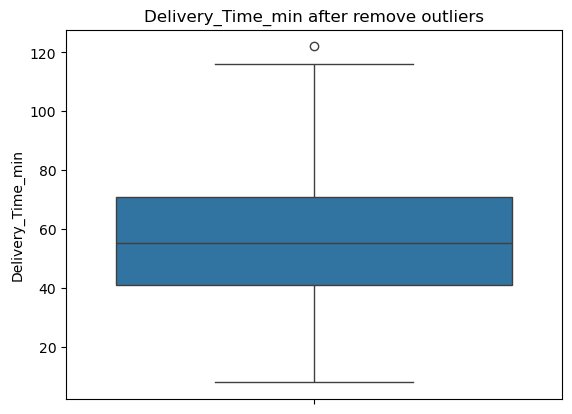

In [47]:
sns.boxplot(df_read['Delivery_Time_min'])
plt.title(f'Delivery_Time_min after remove outliers')
plt.show()

still 1 outlier, but it doesn't matter, because it is not extreme. Now, **let's do feature selection 🤖**. The best feature is preparation_time_min because it has the highest correlation

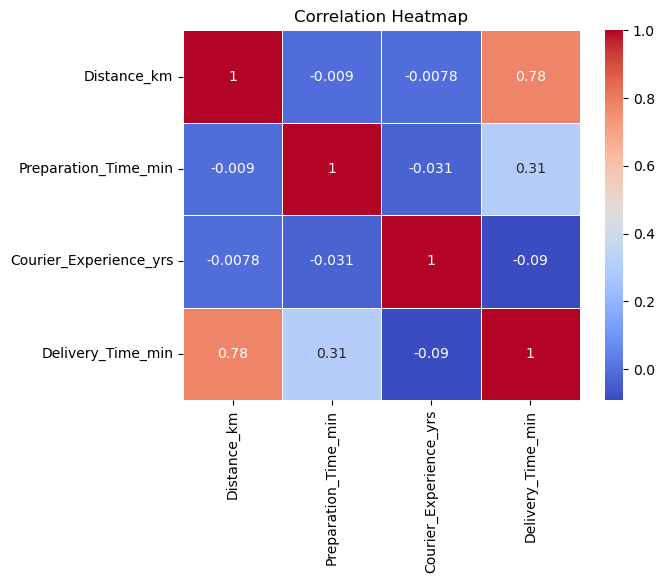

In [48]:
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

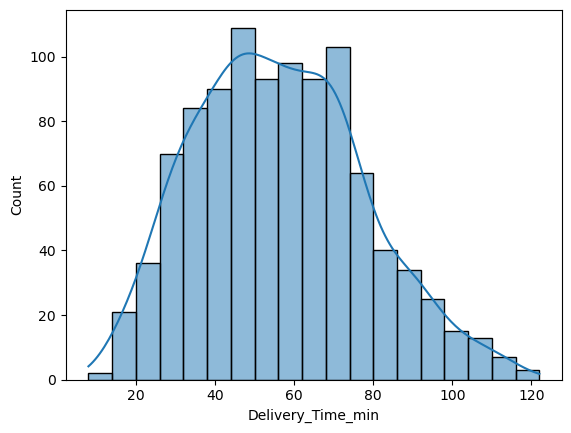

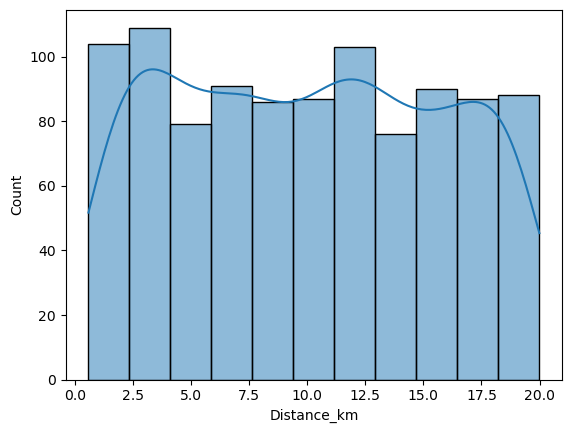

In [49]:
sns.histplot(df_read['Delivery_Time_min'], kde=True)
plt.show()
sns.histplot(df_read['Distance_km'], kde=True)
plt.show()

In [50]:
df_read.skew(numeric_only=True)

Distance_km               0.038840
Preparation_Time_min      0.030008
Courier_Experience_yrs   -0.011534
Delivery_Time_min         0.339618
Experience_group         -0.212289
dtype: float64

the skewness is also fine, but i want to experiment by transforming it into more normalized distribution, would it effect the corr?

In [51]:
def log_transformation(data):
     return np.log1p(data)

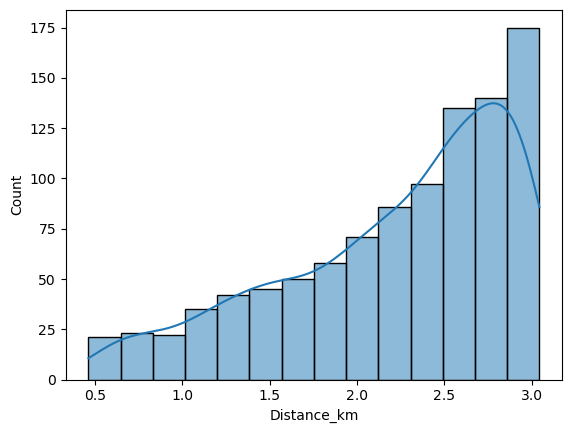

In [52]:
Distance_km_trans = log_transformation(df_read['Distance_km'])
sns.histplot(Distance_km_trans, kde=True)
plt.show()

In [53]:
Distance_km_trans.skew()

-0.7992124269305142

In [54]:
def train_test_split(X, y, test_size=0.2):
     indices = np.arange(X.shape[0])
     np.random.shuffle(indices)
     
     test_count = int(X.shape[0] * test_size)
     test = indices[:test_count]
     train = indices[test_count:]
     
     X_train, X_test = X[train], X[test]
     y_train, y_test = y[train], y[test]
     
     return X_train, X_test, y_train, y_test

In [55]:
X = np.array(df_read['Distance_km'])
y = np.array(df_read['Delivery_Time_min'])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<div style="background-color:red; padding:20px; color:white; border-radius:15px; text-align:center; font-size:30px; font-family:'Poppins';">3 | Modeling </div>


**Linear Regression Ordinary Least Squares**📈 \
this method get the best fitting line directly, suitable for smaller dataset

In [57]:
class LinearRegressionOLS:
	def __init__(self):
		self.slope = 0
		self.intercept = 0 
		
	def fit(self, X, y):
		self.X_train = X
		self.y_train = y

	def predict(self):
		X_mean = self.X_train.mean()
		y_mean = self.y_train.mean()

		# slope = numerator / denominator = rise / run
		numerator = np.sum((self.X_train - X_mean) * (self.y_train - y_mean))
		denominator = np.sum((self.X_train - X_mean) ** 2)

		self.slope = numerator / denominator
		self.intercept = y_mean - self.slope * X_mean 

	def _predict(self, x):
		return self.slope * x + self.intercept

**Linear Regression Gradient Descent**📈 \
this method uses optimization method, in which it gets the slope and intercept slowly by process, suitable for bigger dataset

In [58]:
class LinearRegressionGD:
     def __init__(self, learning_rate=0.1, epochs=100):
          self.lr = learning_rate
          self.epochs = epochs
          self.losses = []
          self.slope = 0.0
          self.intercept = 0.0
          
     def fit(self, X, y):
          self.X_train = X
          self.y_train = y
          n_samples = len(self.X_train)
          
          for iter in range(self.epochs):
               y_pred = self.slope * self.X_train + self.intercept
               
               # keeping track of the losses
               loss = (1 / n_samples) * np.sum(self.X_train * (y_pred - self.y_train)) ** 2
               self.losses.append(loss)
               
               # calc the descent of slope and intercept
               # get the magnitude value that will be used to adjust slope
               descent_slope = (-2 / n_samples) * np.sum((self.X_train * (self.y_train - y_pred)))
               # get the magnitude value that will be used to adjust slope
               descent_intercept = (-2 / n_samples) * np.sum(self.y_train - y_pred)
               
               self.slope -= self.lr * descent_slope
               self.intercept -= self.lr * descent_intercept
               
          return y_pred
     
     def _predict(self, x):
          return self.slope * x + self.intercept

**Function to Measure The Error**📈

In [59]:
def meanAbsError(y_pred, y_true):
     return np.mean(np.abs(y_pred - y_true))

def meanAbsPercengeError(y_pred, y_true):
     return np.mean(np.abs(y_pred - y_true) / len(y_true)) * 100

In [60]:
modelOLS = LinearRegressionOLS()
modelOLS.fit(X_train, y_train)
modelOLS.predict()
y_pred_OLS = modelOLS._predict(42) 
y_pred_OLS

149.52241805680723

In [61]:
mae = round(meanAbsError(y_pred_OLS, y_test), 2)
mape = round(meanAbsPercengeError(y_pred_OLS, y_test), 2)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}%')

Mean Absolute Error: 91.85
Mean Absolute Percentage Error: 45.92%


<Axes: >

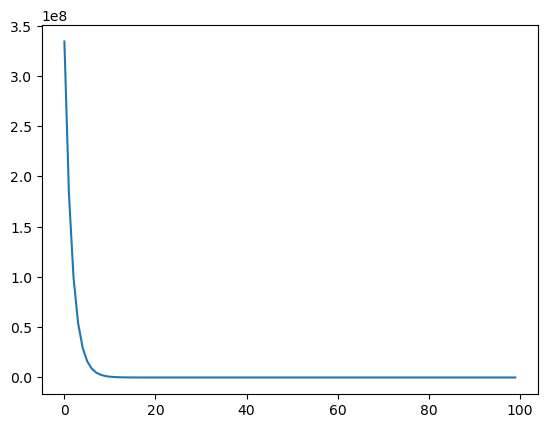

In [62]:
modelGD = LinearRegressionGD(learning_rate=0.001, epochs=100)
modelGD.fit(X_train, y_train)
y_pred_GD = modelGD._predict(X_test) 
sns.lineplot(modelGD.losses)

In [63]:
mae = round(meanAbsError(y_pred_GD, y_test), 2)
mape = round(meanAbsPercengeError(y_pred_GD, y_test), 2)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}%')

Mean Absolute Error: 13.34
Mean Absolute Percentage Error: 6.67%


we can optimize this, let's search for the most suitable learning_rate and epochs

C:\Users\arsya\AppData\Local\Temp\ipykernel_11272\2284627872.py:18: RuntimeWarning: overflow encountered in scalar power
  loss = (1 / n_samples) * np.sum(self.X_train * (y_pred - self.y_train)) ** 2


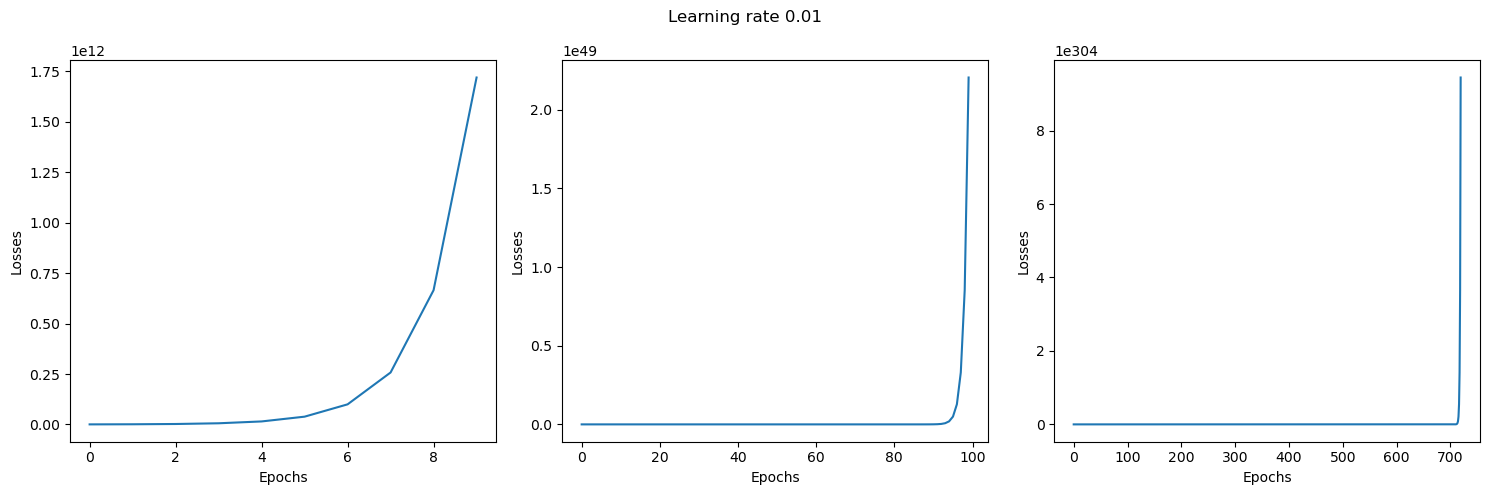

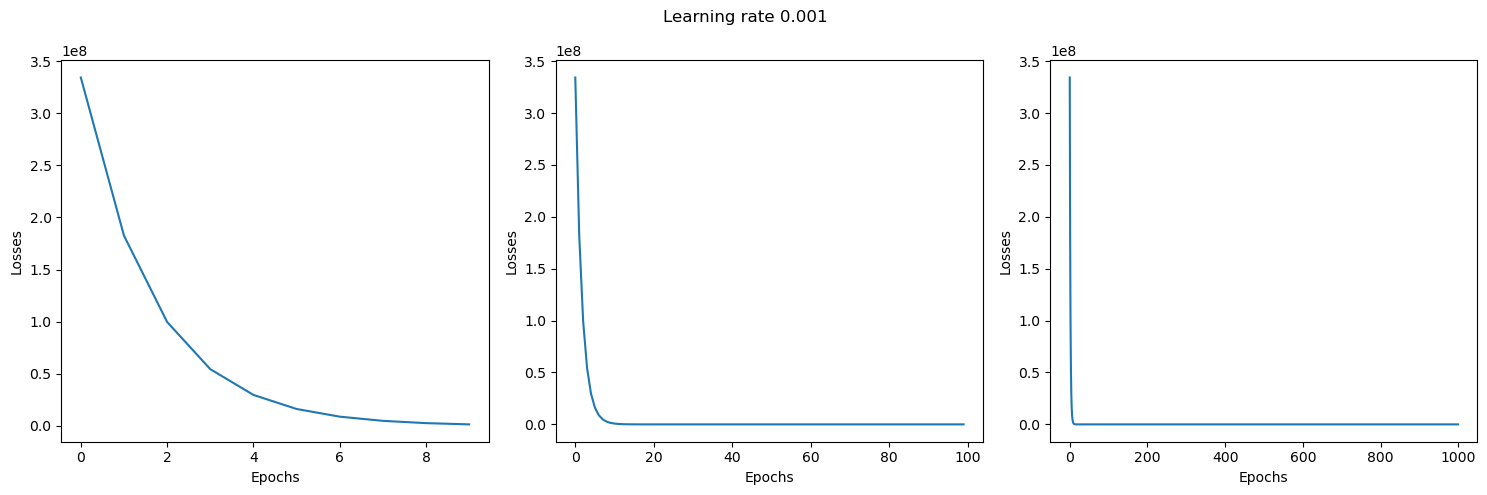

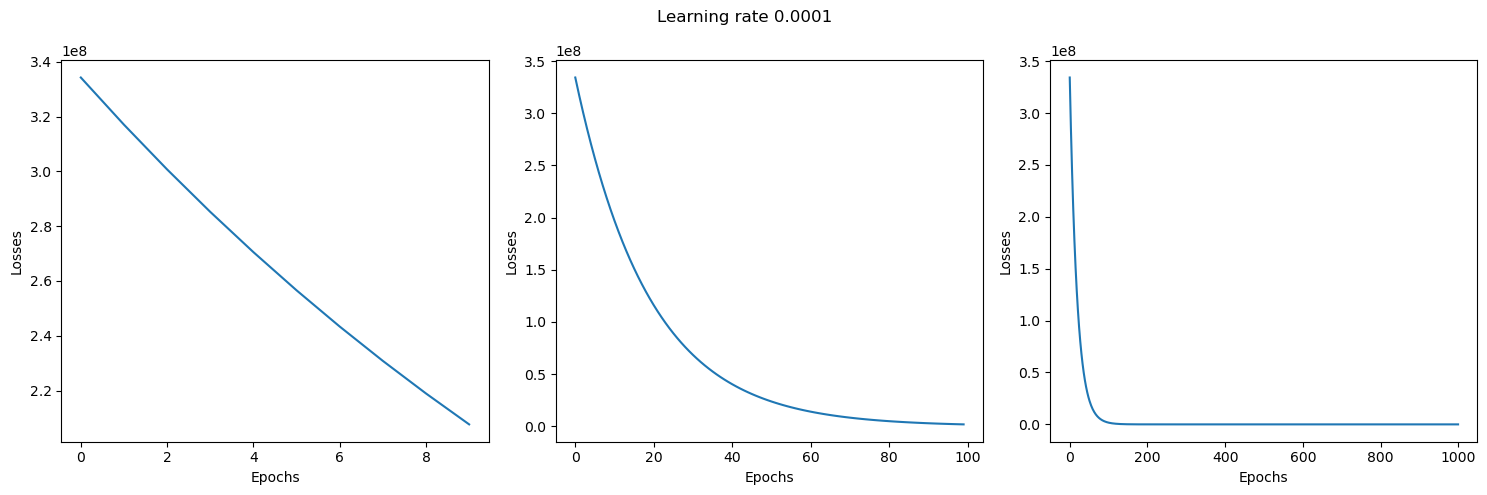

In [64]:
list_lr = [0.01, 0.001, 0.0001]
epochs = [10, 100, 1000]

for lr in list_lr:
	plt.figure(figsize=(15, 5))
	for i, epoch in enumerate(epochs):
		plt.subplot(1, 3, i+1)
		modelGD = LinearRegressionGD(learning_rate=lr, epochs=epoch)
		modelGD.fit(X_train, y_train)
		sns.lineplot(modelGD.losses)
		plt.ylabel('Losses')
		plt.xlabel('Epochs')
	plt.suptitle(f'Learning rate {lr}')
	plt.tight_layout()
	plt.show()

**Search for best pair of learning rate and epochs** ✅ 
- lr 0.01 is not suitable
- lr 0.001 with 10 epochs is nice
- lr 0.0001 with 100 epochs is nice

C:\Users\arsya\AppData\Local\Temp\ipykernel_11272\2284627872.py:18: RuntimeWarning: overflow encountered in scalar power
  loss = (1 / n_samples) * np.sum(self.X_train * (y_pred - self.y_train)) ** 2


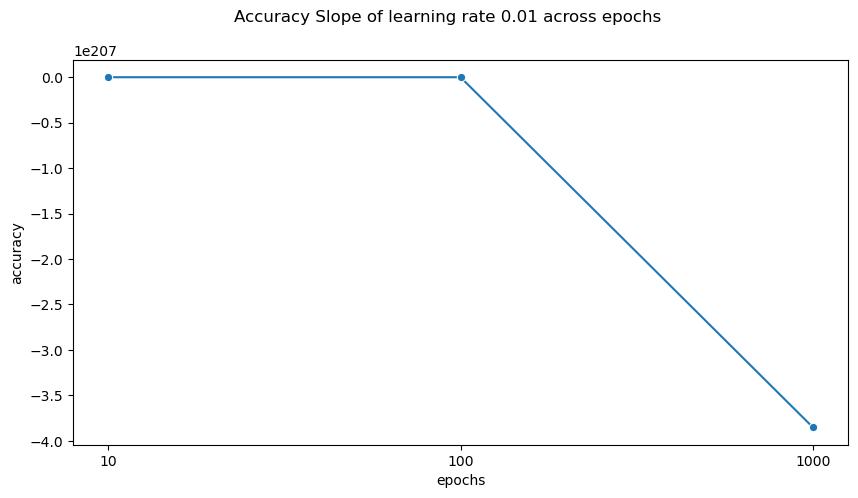

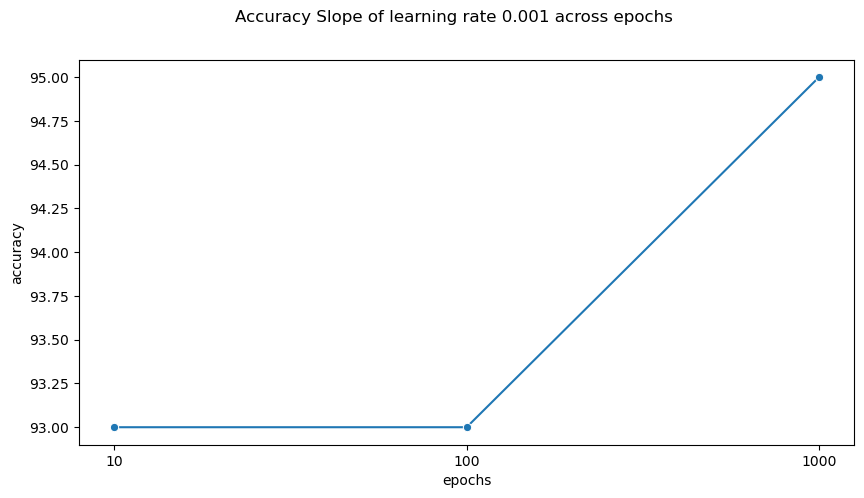

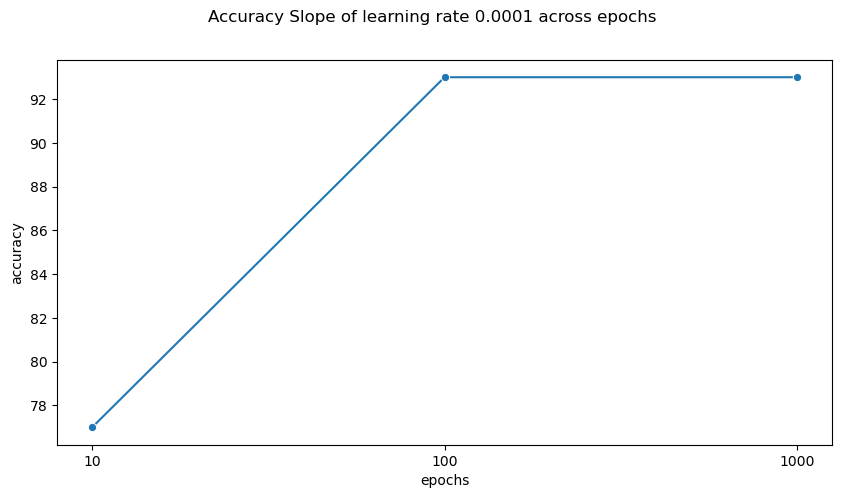

In [65]:
list_lr = [0.01, 0.001, 0.0001]
epochs = [10, 100, 1000]

for lr in list_lr:
	plt.figure(figsize=(10, 5))
	accuracies = []
	for epoch in epochs:
		modelGD = LinearRegressionGD(learning_rate=lr, epochs=epoch)
		modelGD.fit(X_train, y_train)
		y_pred_GD = modelGD._predict(X_test) 
		accuracy = 100 - round(meanAbsPercengeError(y_pred_GD, y_test))
		accuracies.append(accuracy)
	sns.lineplot(accuracies, marker='o')
	plt.xlabel('epochs')
	plt.ylabel('accuracy')
	plt.suptitle(f'Accuracy Slope of learning rate {lr} across epochs')
	plt.xticks(range(0, 3, 1), epochs)
	plt.show()

lr 0.001 starts with higher accuracy while lr 0.0001 start with lower accuracy because it converged slower, which is better, because it wouldn't take large memory for each iteration

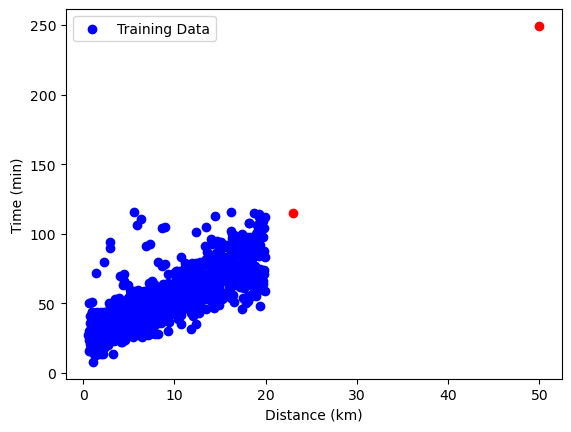

In [74]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import os
from datetime import datetime

class DeliveryTimePredictionApp:

    def __init__(self, root):
        self.root = root
        self.root.title("Delivery Time Prediction App")
        self.root.attributes('-fullscreen', True)
        self.history = self.load_history_from_pickle()  

        self.tab_control = ttk.Notebook(root)  
        self.predict_tab = ttk.Frame(self.tab_control)  
        self.history_tab = ttk.Frame(self.tab_control)  
        self.setting_tab = ttk.Frame(self.tab_control)  

        self.tab_control.add(self.predict_tab, text="Predict")  
        self.tab_control.add(self.history_tab, text="History")  
        self.tab_control.add(self.setting_tab, text="Settings")  
        self.tab_control.pack(expand=1, fill='both')  

        self.X_train, self.y_train = X_train.reshape(-1, 1), y_train
        self.model = None  

        self.init_setting_tab()  
        self.init_predict_tab()  
        self.init_history_tab()  

    def initialize_model(self):  
        if self.model_select.get() == "OLS":
            model = LinearRegressionOLS()
        else:
            model = LinearRegressionGD(learning_rate=float(self.learning_rate_select.get()), epochs=int(self.epochs_entry.get()))

        # Fit the model with training data  
        model.fit(self.X_train, self.y_train)  
        return model  

    def init_predict_tab(self):  
        predict_form_frame = ttk.Frame(self.predict_tab)  
        predict_form_frame = ttk.Frame(self.predict_tab)  
        predict_form_frame.grid(column=0, row=1, sticky="nsew")  

        ttk.Label(predict_form_frame, text="Input Distance (km)", font=('Poppins', 20)).grid(row=0, column=0, padx=10, pady=10)  
        self.distance_entry = ttk.Entry(predict_form_frame)  
        self.distance_entry.grid(row=0, column=1, padx=10, pady=10)  

        ttk.Button(predict_form_frame, text="Predict", command=self.predict_and_plot).grid(row=1, column=0, columnspan=2, pady=10)  

        self.fig, self.ax = plt.subplots()  
        self.canvas = FigureCanvasTkAgg(self.fig, master=predict_form_frame)  
        self.canvas.get_tk_widget().grid(row=2, column=0, columnspan=2, pady=10)  

        self.predict_and_plot(initial_plot=True)

    def init_history_tab(self):  
        self.history_tree = ttk.Treeview(self.history_tab, columns=('timestamp', 'time_predicted', 'distance'), show='headings')  
        self.history_tree.heading('timestamp', text='Timestamp')  
        self.history_tree.heading('time_predicted', text='Time Predicted (min)')  
        self.history_tree.heading('distance', text='Distance (km)')  
        self.history_tree.grid(row=0, column=0, padx=10, pady=10)  

        ttk.Button(self.history_tab, text="Compare Selected", command=self.compare_selected).grid(row=1, column=0, pady=10)  

        # Update history table with existing data  
        self.update_history()  

    def init_setting_tab(self):  
        self.sandbox_mode_var = tk.BooleanVar()  
        ttk.Checkbutton(self.setting_tab, text="SandBox Mode", variable=self.sandbox_mode_var, command=self.toggle_sandbox_mode).grid(row=0, column=0, padx=10)  

        ttk.Label(self.setting_tab, text="Learning Rate:").grid(row=1, column=0, padx=10, pady=10)  
        self.learning_rate_var = tk.StringVar(value="0.01")  
        self.learning_rate_select = ttk.Combobox(self.setting_tab, textvariable=self.learning_rate_var, values=[0.01, 0.001, 0.0001])  
        self.learning_rate_select.grid(row=1, column=1, padx=10, pady=10)  

        ttk.Label(self.setting_tab, text="Epochs:").grid(row=2, column=0, padx=10, pady=10)  
        self.epochs_var = tk.IntVar(value=10)  
        self.epochs_entry = ttk.Entry(self.setting_tab, textvariable=self.epochs_var)  
        self.epochs_entry.grid(row=2, column=1, padx=10, pady=10)  

        ttk.Label(self.setting_tab, text="Model:").grid(row=3, column=0, padx=10, pady=10)  
        self.model_var = tk.StringVar(value="OLS")  
        self.model_select = ttk.Combobox(self.setting_tab, textvariable=self.model_var, values=["OLS", "Gradient Descent"])  
        self.model_select.grid(row=3, column=1, padx=10, pady=10)  

        ttk.Button(self.setting_tab, text="Save Settings", command=self.save_settings).grid(row=4, column=0, columnspan=2, pady=10)  

    def predict_and_plot(self, initial_plot=False):  
        if initial_plot:
            self.ax.scatter(self.X_train, self.y_train, color='blue', label="Training Data")
            self.ax.set_xlabel("Distance (km)")  
            self.ax.set_ylabel("Time (min)")  
            self.ax.legend()  
            self.canvas.draw()
            return

        distance = float(self.distance_entry.get())  

        if self.model is None:  
            self.model = self.initialize_model()  # Initialize model and fit it  
        prediction = self.model.predict(np.array([[distance]]))  
        prediction = prediction[0]  

        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")  
        new_row = pd.DataFrame({'timestamp': [timestamp], 'time_predicted': [prediction], 'distance': [distance], 'Regression Model': [self.model_select.get()], 'Epochs': [self.epochs_entry.get()], 'Learning Rate': [self.learning_rate_select.get()]})  
        self.history = pd.concat([self.history, new_row], ignore_index=True)  
        self.ax.scatter(distance, prediction, color="red", label="Prediction")  
        self.canvas.draw()  
        self.update_history()  

        self.save_to_pickle()  

        messagebox.showinfo("Prediction", f"Predicted Time: {prediction:.2f} minutes")  

    def update_history(self):  
        for row in self.history_tree.get_children():  
            self.history_tree.delete(row)  
        for index, row in self.history.iterrows():  
            self.history_tree.insert('', 'end', values=(row['timestamp'], row['time_predicted'], row['distance'], row['Regression Model'], row['Epochs'], row['Learning Rate']))  

    def compare_selected(self):  
        selected_items = self.history_tree.selection()  
        if len(selected_items) != 2:  
            messagebox.showerror("Selection Error", "Please select exactly two items to compare.")  
            return  

        item1 = self.history_tree.item(selected_items[0], 'values')  
        item2 = self.history_tree.item(selected_items[1], 'values')  
        
        self.compare_frame = ttk.Frame(self.history_tab)
        self.compare_frame.grid(row=0, column=3)
        
        self.compare1 = tk.Frame(self.compare_frame,)
        self.compare1.grid(row=1, column=2)
        ttk.Label(self.compare1, text="Compare 1", font=('Poppins', 20)).grid(row=0, column=1, padx=(40, 0))
        ttk.Label(self.compare1, 
            text=f"""
            Timestamp: {item1[0]}
            Time Prediction: {item1[1]}
            Distance: {item1[2]}
            Regression Model: {item1[3]}
            Epochs: {item1[4]}
            Learning Rate: {item1[5]}
            """, font=('Poppins', 15)).grid(row=1, column=1,)
        
        self.compare2 = tk.Frame(self.compare_frame, )
        self.compare2.grid(row=1, column=3)
        ttk.Label(self.compare2, text="Compare 2", font=('Poppins', 20)).grid(row=0, column=1, padx=(40, 0))
        ttk.Label(self.compare2, 
            text=f"""
            Timestamp: {item2[0]}
            Time Prediction: {item2[1]}
            Distance: {item2[2]}
            Regression Model: {item2[3]}
            Epochs: {item2[4]}
            Learning Rate: {item2[5]}
            """, font=('Poppins', 15)).grid(row=1, column=1, )
        

    def toggle_sandbox_mode(self):  
        self.sandbox_mode = self.sandbox_mode_var.get()  
        if self.sandbox_mode:  
            messagebox.showinfo("Sandbox Mode", "Sandbox mode is ON. You can manually adjust settings.")  
        else:  
            messagebox.showinfo("Sandbox Mode", "Sandbox mode is OFF.")  

    def save_settings(self):  
        if self.sandbox_mode:  
            learning_rate = self.learning_rate_var.get()  
            epochs = self.epochs_var.get()  
            model = self.model_var.get()  
            messagebox.showinfo("Settings Saved", f"Learning Rate: {learning_rate}\nEpochs: {epochs}\nModel: {model}")  
            # Reinitialize the model with new settings  
            self.model = self.initialize_model()  
            self.predict_and_plot(initial_plot=True)  
        else:  
            messagebox.showerror("Settings Error", "Sandbox mode is OFF. Cannot save settings.")  

    def save_to_pickle(self):   
        filename = 'delivery_time_predictions.pkl'  
        try:  
            self.history.to_pickle(filename)  
        except Exception as e:  
            messagebox.showerror("File Error", f"Failed to save to pickle: {e}")  

    def load_history_from_pickle(self):  
        filename = 'delivery_time_predictions.pkl'  
        try:  
            if os.path.exists(filename):  
                return pd.read_pickle(filename)  
            else:  
                return pd.DataFrame(columns=['timestamp', 'time_predicted', 'distance'])  
        except Exception as e:  
            messagebox.showerror("File Error", f"Failed to load from pickle: {e}")  
            return pd.DataFrame(columns=['timestamp', 'time_predicted', 'distance'])  
        
if __name__ == "__main__":
    root = tk.Tk()
    app = DeliveryTimePredictionApp(root)
    root.mainloop()
